# Sales

In [1]:
import requests
import pandas as pd
import numpy as np
import json
import time
from datetime import date

In [ ]:
# Склад остатки - stocks?dateFrom=2023-04-12
# Заказы        - orders?dateFrom=2023-02-09&flag=0
# Продажи       - sales?dateFrom=2023-02-09&flag=0
# Поставки      - incomes?dateFrom=2023-03-19
# Отчет о продажах по реализации - reportDetailByPeriod?dateFrom=2023-02-09&dateTo=2023-02-28

In [31]:
# Выгружаем данные
# На выходе получается строка с информацие в виде словаря
url = "https://statistics-api.wildberries.ru/api/v1/supplier/sales?dateFrom=2023-01-01&flag=0"
payload = {}
headers = {
  'Authorization': ''
}
response = requests.request("GET", url, headers=headers, data=payload)
print(response.text)

[{"date":"2023-02-24T12:22:32","lastChangeDate":"2023-02-25T04:42:29","supplierArticle":"Этнический халат","techSize":"XS-L","barcode":"2037488839493","totalPrice":6400,"discountPercent":41,"isSupply":false,"isRealization":true,"promoCodeDiscount":0,"warehouseName":"Коледино","countryName":"Россия","oblastOkrugName":"Центральный федеральный округ","regionName":"Москва","incomeID":10960235,"saleID":"S4598764411","odid":9001947819539,"spp":0,"forPay":2907.52,"finishedPrice":2908.52,"priceWithDisc":3776,"nmId":147263932,"subject":"Халаты домашние","category":"Одежда","brand":"","IsStorno":0,"gNumber":"96772691678002781140","sticker":"","srid":"17823514073508166.1.0"},{"date":"2023-02-25T16:37:49","lastChangeDate":"2023-02-25T18:01:29","supplierArticle":"Синий халат","techSize":"XS-L","barcode":"2037488779201","totalPrice":5800,"discountPercent":0,"isSupply":false,"isRealization":true,"promoCodeDiscount":0,"warehouseName":"Коледино","countryName":"Россия","oblastOkrugName":"Центральный фед

# Предварительная обработка таблицы

In [32]:
# Данные в переменную
str_total = response.text  # достаём данные в строку
str_total

'[{"date":"2023-02-24T12:22:32","lastChangeDate":"2023-02-25T04:42:29","supplierArticle":"Этнический халат","techSize":"XS-L","barcode":"2037488839493","totalPrice":6400,"discountPercent":41,"isSupply":false,"isRealization":true,"promoCodeDiscount":0,"warehouseName":"Коледино","countryName":"Россия","oblastOkrugName":"Центральный федеральный округ","regionName":"Москва","incomeID":10960235,"saleID":"S4598764411","odid":9001947819539,"spp":0,"forPay":2907.52,"finishedPrice":2908.52,"priceWithDisc":3776,"nmId":147263932,"subject":"Халаты домашние","category":"Одежда","brand":"","IsStorno":0,"gNumber":"96772691678002781140","sticker":"","srid":"17823514073508166.1.0"},{"date":"2023-02-25T16:37:49","lastChangeDate":"2023-02-25T18:01:29","supplierArticle":"Синий халат","techSize":"XS-L","barcode":"2037488779201","totalPrice":5800,"discountPercent":0,"isSupply":false,"isRealization":true,"promoCodeDiscount":0,"warehouseName":"Коледино","countryName":"Россия","oblastOkrugName":"Центральный фе

In [33]:
# Создаём первую строку датафрэйма
# Убираем лишние символы, разбиваем, берём первый заказ, добавляем символы для словаря
s_first = '{' + str_total.replace('[', '').replace(']', '').split('},{')[0].replace('{', '').replace('}', '') + '}'
# преобразуем словарь
json_acceptable_string = s_first.replace('"', "\"")
data = json.loads(json_acceptable_string)
# словарь в дф
df = pd.DataFrame([data])
df

,date,lastChangeDate,supplierArticle,techSize,barcode,totalPrice,discountPercent,isSupply,isRealization,promoCodeDiscount,...,finishedPrice,priceWithDisc,nmId,subject,category,brand,IsStorno,gNumber,sticker,srid
0,2023-02-24T12:22:32,2023-02-25T04:42:29,Этнический халат,XS-L,2037488839493,6400,41,False,True,0,...,2908.52,3776,147263932,Халаты домашние,Одежда,,0,96772691678002781140,,17823514073508166.1.0


In [34]:
# Проходимся циклом по строке и дополняем датафрэйм
# Запускать 1 раз!
str_need = str_total.split('},{')
for i in str_need[1:]:  # Со второго элемента, так как первый уже закинул в дф
    i = '{' + i.replace('[', '').replace(']', '').replace('{', '').replace('}', '') + '}'
    json_acceptable_string = i.replace('"', "\"")
    data = json.loads(json_acceptable_string)
    df_t = pd.DataFrame([data])
    df = pd.concat([df, df_t])
df = df.reset_index(drop=True)
df.head(3)

,date,lastChangeDate,supplierArticle,techSize,barcode,totalPrice,discountPercent,isSupply,isRealization,promoCodeDiscount,...,finishedPrice,priceWithDisc,nmId,subject,category,brand,IsStorno,gNumber,sticker,srid
0,2023-02-24T12:22:32,2023-02-25T04:42:29,Этнический халат,XS-L,2037488839493,6400,41,False,True,0,...,2908.52,3776,147263932,Халаты домашние,Одежда,,0,96772691678002781140,,17823514073508166.1.0
1,2023-02-25T16:37:49,2023-02-25T18:01:29,Синий халат,XS-L,2037488779201,5800,0,False,True,0,...,4467.00,5800,147263461,Халаты домашние,Одежда,,0,91433118403877690020,,9538672573592714.0.0
2,2023-02-25T16:37:49,2023-02-25T18:01:29,Этнический халат,XS-L,2037488839493,6400,0,False,True,0,...,4929.00,6400,147263932,Халаты домашние,Одежда,,0,97874704616322445551,,9538672573605161.0.0


In [35]:
# Создали колонку с датами покупки / отмены покупки
df = df.assign(date_corr = df.date.apply(lambda x: x.split('T')[0]))

In [36]:
# Даты в тип с датой продажи
df['date_corr'] = pd.to_datetime(df['date_corr'],format='%Y-%m-%d')

date_corr - Дата и время продажи
gNumber - Номер заказа - ДУБЛИРУЮТСЯ ЗНАЧЕНИЯ! - в заказе (выкупе) несколько позиций
saleID - Уникальный идентификатор продажи/возврата. R - возврат / S - продажа
! odid - Уникальный идентификатор позиции заказа. Может использоваться для поиска соответствия между заказами и продажами.

totalPrice - Цена до согласованной итоговой скидки/промо/спп.
discountPercent - Согласованный итоговый дисконт
promoCodeDiscount - Скидка по промокоду
forPay - К перечислению продавцу
finishedPrice - Фактическая цена заказа с учетом всех скидок
priceWithDisc - Цена, от которой считается вознаграждение продавца forpay (с учетом всех согласованных скидок)

supplierArticle - Артикул продавца
techSize - размер
nmId - Артикул WB
incomeID - Номер поставки (от продавца на склад)

subject - Предмет
srid - Уникальный идентификатор заказа, функционально аналогичный odid/rid

In [37]:
# Оставляем нужные колонки
df = df[['date_corr', 'gNumber', 'saleID', 'odid',  \
         'supplierArticle', 'techSize', 'nmId', 'incomeID', 'subject', 'srid', 'totalPrice', 'forPay']].copy()

In [9]:
# Сохраним файл с возвратами
today = date.today()
df.to_excel(f'sales_with_returns_{today}.xlsx')
df.to_csv(f'sales_with_returns_{today}.csv')

# Нашли и убрали возвраты

In [38]:
# Поиск возвртаов - создание новой колонки с возвратами
df = df.assign(returns = df.saleID.str.startswith('R') * 1)  # начало строки с R - возврат

In [39]:
# Анализ возвратов
df[df.returns == 1][['date_corr', 'supplierArticle', 'techSize', 'nmId', 'incomeID', 'forPay']]
# Провести работу по проверке качества товара в этом списке!

,date_corr,supplierArticle,techSize,nmId,incomeID,forPay
64,2023-04-14,Этнический халат,XS-L,147263932,10960235,-2355.2
66,2023-04-14,Этнический халат,XS-L,147263932,10960235,-2355.2
100,2023-06-03,Голубалдеж,XS-S,159411808,12206148,-2880.0


In [40]:
# Удалить позиции товаров, которые были возвращены
#df.odid.value_counts()  # Больше 1 - наши позиции

# Вытащили строки / индексы строк, где есть выкупы с возвратом
#df[(df.odid == 9002441627516)|(df.odid == 9002917762019)|(df.odid == 9002389801980)].index
# [63, 64, 66, 67, 99, 100]

df = df.drop([63, 64, 66, 67, 99, 100], axis=0)

# Себестоимость

In [15]:
# Таблица предоставлена продавцом 16.06.2023
sebes = pd.read_excel('')
sebes = sebes.rename(columns={'articul': 'supplierArticle'})
sebes = sebes[['supplierArticle', 'cost']]
sebes

,supplierArticle,cost
0,Этнический халат,1410
1,Синий халат,1600
2,Шелковая пижама лист1,2000
3,Шелковая пижама белые листья,2000
4,Цвет ЗАРА,1700
5,черный журавли,1700
6,Черно-белый,1900
7,Красный,1700
8,Тигры,1600
9,Голубалдеж,1450


# Добавили колонки с прибылью

In [16]:
# Приклеили колонку с себестоимостью
df = df.merge(sebes, how='left', on='supplierArticle')

In [17]:
# Добавил колонку с прибылью и процентом прибыли
df['profit'] = df.forPay - df.cost
df['profit_prc'] = round(df.profit / df.forPay * 100)

In [41]:
# Сохраним файл без возвратов
today = date.today()
df.to_excel(f'sales_without_returns_{today}.xlsx', index=False)
df.to_csv(f'sales_without_returns_{today}.csv', index=False)

# Анализ Таблицы

In [185]:
# Сводная информация по выкупам по артикулам - количество продаж / суммарная выручка / средний чек выручки
# Максимальная / минимальная стоимость выкупа
t = df.groupby('supplierArticle', as_index=False).agg({'forPay': ['count', 'sum', 'mean', 'max', 'min']})
t.columns = ['_'.join(col).strip() for col in t.columns.values]
t = t.sort_values('forPay_count', ascending=False)
t

,supplierArticle_,forPay_count,forPay_sum,forPay_mean,forPay_max,forPay_min
8,Этнический халат,44,115797.76,2631.767273,4928.00,1920.00
2,Синий халат,25,60875.64,2435.025600,4466.00,1206.40
7,Шелковая пижама лист1,14,45139.24,3224.231429,5159.00,1658.25
0,Голубалдеж,13,39434.88,3033.452308,3456.00,2618.88
6,Шелковая пижама белые листья,5,11329.70,2265.940000,5159.00,1500.80
4,Цвет ЗАРА,4,8287.62,2071.905000,2479.50,1479.00
5,Черно-белый,4,9749.76,2437.440000,2592.00,2099.20
9,черный журавли,3,6330.12,2110.040000,2473.12,1856.00
1,Красный,2,4959.00,2479.500000,2479.50,2479.50
3,Тигры,2,4428.30,2214.150000,2479.50,1948.80


In [78]:
# Сводная информация по выкупам по артикулам в файл
today = date.today()
t.to_excel(f'Сводная информация по выкупам по артикулам_{today}.xlsx', index=False)

In [195]:
# Сводная информация по прибыли по артикулам - количество выкупов / суммарная прибыль / средняя прибыль
# Максимальная / минимальная прибыль
s = df.groupby('supplierArticle', as_index=False).agg({'profit': ['count', 'sum', 'mean', 'max', 'min']})
s.columns = ['_'.join(col).strip() for col in s.columns.values]
s = s.sort_values('profit_mean', ascending=False)
s

,supplierArticle_,profit_count,profit_sum,profit_mean,profit_max,profit_min
0,Голубалдеж,13,20584.88,1583.452308,2006.00,1168.88
7,Шелковая пижама лист1,14,17139.24,1224.231429,3159.00,-341.75
8,Этнический халат,44,53757.76,1221.767273,3518.00,510.00
2,Синий халат,25,20875.64,835.025600,2866.00,-393.60
1,Красный,2,1559.00,779.500000,779.50,779.50
3,Тигры,2,1228.30,614.150000,879.50,348.80
5,Черно-белый,4,2149.76,537.440000,692.00,199.20
9,черный журавли,3,1230.12,410.040000,773.12,156.00
4,Цвет ЗАРА,4,1487.62,371.905000,779.50,-221.00
6,Шелковая пижама белые листья,5,1329.70,265.940000,3159.00,-499.20


In [88]:
# Сводная информация по выкупам по артикулам в файл
today = date.today()
s.to_excel(f'Сводная информация по прибыли по артикулам_{today}.xlsx', index=False)

In [204]:
# Суммарная информация
print(today)
print('Итого продано позиций (возвраты учтены):', t.forPay_count.sum(), 'штук')
print('Суммарная выручка:', round(t.forPay_sum.sum()), 'руб.')
print('Суммарная прибыль (с учётом убытка):', round(s.profit_sum.sum()), 'руб.')
print('Топовый товар по выручке / выручка с него:', t.supplierArticle_.to_list()[0]  \
      , '/', round(t.forPay_sum.to_list()[0]), 'руб.')
print('Топовый товар по прибыли / прибыль с него:', s.sort_values('profit_sum', ascending=False).supplierArticle_.to_list()[0]  \
      , '/', round(s.sort_values('profit_sum', ascending=False).profit_sum.to_list()[0]), 'руб.')
print('Средний чек выкупа по всем артикулам:', round(t.forPay_mean.mean()), 'руб.')
print('Средний чек прибыли по всем артикулам:', round(s.profit_mean.mean()), 'руб.')

2023-06-16
Итого продано позиций (возвраты учтены): 116 штук
Суммарная выручка: 306332 руб.
Суммарная прибыль (с учётом убытка): 121342 руб.
Топовый товар по выручке / выручка с него: Этнический халат / 115798 руб.
Топовый товар по прибыли / прибыль с него: Этнический халат / 53758 руб.
Средний чек выкупа по всем артикулам: 2490 руб.
Средний чек прибыли по всем артикулам: 784 руб.


In [42]:
# Разбивка количества выкупов по месяцам
r = df.sort_values('date_corr').set_index('date_corr').resample(rule='m').totalPrice.count()  \
    .reset_index().rename(columns={'totalPrice':'quant_sales'})
r

,date_corr,quant_sales
0,2023-02-28,12
1,2023-03-31,41
2,2023-04-30,20
3,2023-05-31,22
4,2023-06-30,24


In [19]:
# Разбивка суммы выкупов по месяцам
e = df.sort_values('date_corr').set_index('date_corr').resample(rule='m').forPay.sum()  \
    .reset_index().rename(columns={'forPay':'sum_sales'})
e

,date_corr,sum_sales
0,2023-02-28,49147.56
1,2023-03-31,114949.52
2,2023-04-30,36287.36
3,2023-05-31,55970.58
4,2023-06-30,55347.00


In [203]:
# Разбивка прибыли по месяцам
w = df.sort_values('date_corr').set_index('date_corr').resample(rule='m').profit.sum()  \
    .reset_index().rename(columns={'profit':'sum_profit'})
w

,date_corr,sum_profit
0,2023-02-28,29297.56
1,2023-03-31,45769.52
2,2023-04-30,3017.36
3,2023-05-31,23160.58
4,2023-06-30,20097.00


<AxesSubplot:>

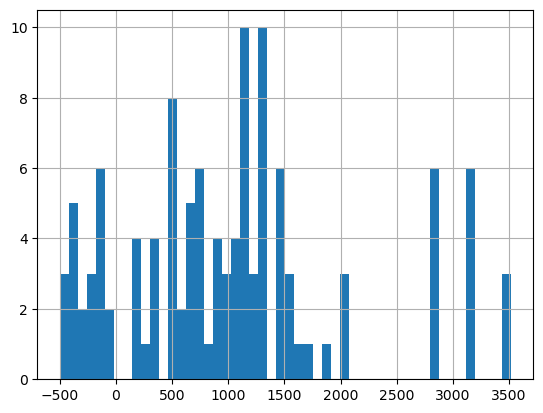

In [205]:
# Картинка по размеру профита с единицы продажи
df.profit.hist(bins=50)

<AxesSubplot:>

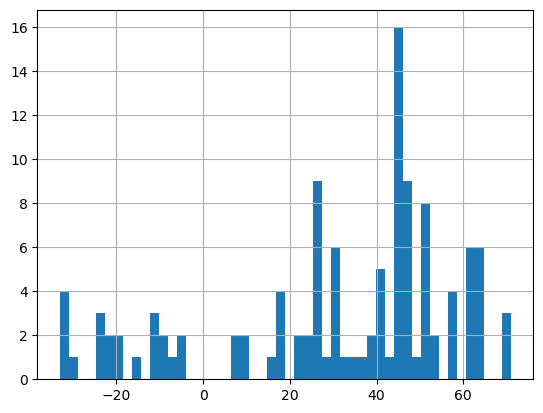

In [206]:
# Картинка по % профита с единицы продажи
df.profit_prc.hist(bins=50)

In [208]:
# Разбор величины прибыли
df.profit.describe()

count     116.000000
mean     1046.051897
std      1016.847139
min      -499.200000
25%       341.695000
50%       996.400000
75%      1446.880000
max      3518.000000
Name: profit, dtype: float64

# Процент выкупа от количества поставленных товаров

In [209]:
# Загрузка таблицы с поставками товаров
total_incomes = pd.read_excel('C:/Users/Test/Documents/DS/docs/wb/Количество поставленных товаров_2023-06-16.xlsx')
# Прилепили к таблице с прожадами
total_incomes = total_incomes.merge(s, how='left', left_on='supplierArticle', right_on='supplierArticle_')
total_incomes = total_incomes.fillna(0)
total_incomes['sale_prc'] = round(total_incomes.profit_count / total_incomes.quantity_total * 100)
total_incomes = total_incomes[['supplierArticle', 'quantity_total', 'profit_count', 'sale_prc', 'prc_procure']].copy()
total_incomes = total_incomes.sort_values('sale_prc', ascending=False)
total_incomes

,supplierArticle,quantity_total,profit_count,sale_prc,prc_procure
5,Шелковая пижама белые листья,5,5.0,100.0,2
6,Цвет ЗАРА,4,4.0,100.0,2
7,Черно-белый,4,4.0,100.0,2
9,Красный,2,2.0,100.0,1
10,Тигры,2,2.0,100.0,1
8,черный журавли,4,3.0,75.0,2
2,Синий халат,37,25.0,68.0,16
3,Шелковая пижама лист1,25,14.0,56.0,11
0,Этнический халат,95,44.0,46.0,40
1,Голубалдеж,41,13.0,32.0,17


In [191]:
# Процент выкупа от количества поставленных товаров в файл
today = date.today()
total_incomes.to_excel(f'Процент выкупа от количества поставленных товаров_{today}.xlsx', index=False)

# Аналитика убыточных позиций

In [210]:
# Таблица по убыточным позициям
minus = df[df.profit <= 0].sort_values('profit').copy()
minus

,date_corr,gNumber,saleID,odid,supplierArticle,techSize,nmId,incomeID,subject,srid,totalPrice,forPay,returns,cost,profit,profit_prc
68,2023-04-18,6437618239332116631,S5072214813,9002500677175,Шелковая пижама белые листья,XS-L,147271347,10960235,Пижамы,24610572075814720.0.0,6700,1500.80,0,2000,-499.20,-33.0
52,2023-03-30,9341649112037716919,S4902422595,9002173022100,Шелковая пижама белые листья,XS-L,147271347,10960235,Пижамы,27c9c66c781b4ff4933af4eeeae93153,6700,1507.50,0,2000,-492.50,-33.0
63,2023-04-15,96792805988361064309,S5041058838,9002419424335,Шелковая пижама белые листья,XS-L,147271347,10960235,Пижамы,19948536575490229.0.0,6700,1554.40,0,2000,-445.60,-29.0
69,2023-04-19,95999977550126523919,S5078050979,9002354922695,Синий халат,XS-L,147263461,10960235,Халаты домашние,10962733575231238.0.0,5800,1206.40,0,1600,-393.60,-33.0
58,2023-04-05,2174566311541195335,S4953064834,9002332863924,Синий халат,XS-L,147263461,10960235,Халаты домашние,18333228575140238.0.0,5800,1206.40,0,1600,-393.60,-33.0
54,2023-04-02,6171648706341367784,S4926143405,9002285184649,Шелковая пижама белые листья,XS-L,147271347,10960235,Пижамы,10289465574931627.0.0,6700,1608.00,0,2000,-392.00,-24.0
56,2023-04-04,93430644953833326752,S4947405136,9002344660868,Шелковая пижама лист1,XS-L,147271346,10960235,Пижамы,28864473075189779.0.0,6700,1658.25,0,2000,-341.75,-21.0
57,2023-04-04,98944281442958345358,S4946374560,9002344901159,Шелковая пижама лист1,XS-L,147271346,10960235,Пижамы,13218838575190436.0.0,6700,1658.25,0,2000,-341.75,-21.0
64,2023-04-16,97994131845851785554,S5051802587,9002459635971,Синий халат,XS-L,147263461,10960235,Халаты домашние,11276324075637810.0.0,5800,1299.20,0,1600,-300.80,-23.0
98,2023-06-07,2888607278279249232,S5516225497,9003026604288,Синий халат,XS-L,147263461,10960235,Халаты домашние,37075156577932491.0.0,5800,1305.00,0,1600,-295.00,-23.0


In [211]:
# Таблица по убыточным позициям в файл
today = date.today()
minus.to_excel(f'Таблица по убыточным позициям_{today}.xlsx', index=False)

In [212]:
# Сводная информация
print('Итого позиций с убытком, шт:', minus.shape[0])
print('Итого сумма убытков, руб:', round(minus.profit.sum()))

Итого позиций с убытком, шт: 21
Итого сумма убытков, руб: -5765


In [213]:
# Сводник по убыточным позициям - артикул / количество / сумма убытка
y = minus.groupby('supplierArticle', as_index=False).agg({'profit': ['count', 'sum']})
y.columns = ['_'.join(col).strip() for col in y.columns.values]
y = y.sort_values('profit_count', ascending=False)
y

,supplierArticle_,profit_count,profit_sum
0,Синий халат,10,-2494.7
3,Шелковая пижама лист1,6,-1219.7
2,Шелковая пижама белые листья,4,-1829.3
1,Цвет ЗАРА,1,-221.0


# Расчёт конверсии - заказ / выкуп

In [ ]:
# ВЕРНУТЬ ДФ ПО ПРОДАЖАМ С ВОЗВРАТАМИ!

In [20]:
# Загрузка таблицы с заказами
df_orders = pd.read_excel('C:/Users/Test/Documents/DS/docs/wb/orders_2023-06-16_for_conversion.xlsx')
df_orders.head(3)

,odid,supplierArticle,techSize,data_order
0,9001947819539,Этнический халат,XS-L,2023-02-22
1,9001954570071,Этнический халат,XS-L,2023-02-23
2,9001954710126,Синий халат,XS-L,2023-02-23


In [21]:
# Из таблицы с продажами убираем товары, которые были возвращены.
# Для расчёта конверсии не будем принимать во внимание возвраты. Необходимы факты выкупа!
df = df.assign(returns = df.saleID.str.startswith('R') * 1)  # начало строки с R - возврат
df = df[df.returns == 0]  # оставили токлько выкупы
df = df.rename(columns={'date_corr': 'date_sales'})

In [22]:
# Приклеили к таблице заказов таблицу выкупов
df_conv = df_orders.merge(df, how='left', on='odid')
df_conv = df_conv[['odid', 'supplierArticle_x', 'techSize_x', 'data_order', 'date_sales']].copy()  # убрали лишнее

In [23]:
# Добавлена колонка с разницей между датой заказа и выкупом
df_conv['date_diff'] = df_conv.date_sales - df_conv.data_order
df_conv.date_diff = df_conv.date_diff.dt.days  # Конвертация типа дельты времени в дни

In [24]:
# Добавлена колонка с флагом по выкупу
df_conv['sold'] = df_conv.date_diff.apply(lambda x: 1 if x>=0 else 0)  # 0 - не выкуплен ещё

In [25]:
# Сводная информация
today = date.today()
print(today)
print('Итого заказов было сделано:', df_conv.shape[0])
print('Итого заказов было выкуплено:', df_conv[df_conv.sold == 1].shape[0])
print('Итого заказов не было выкуплено:', df_conv[df_conv.sold == 0].shape[0])
print('Общая конверсия заказы / выкупы:', round((df_conv[df_conv.sold == 1].shape[0] / df_conv.shape[0]), 2))
print('Средняя разница между датой заказа и выкупом, дней:', round(df_conv[df_conv.sold == 1].date_diff.mean()))

2023-06-17
Итого заказов было сделано: 184
Итого заказов было выкуплено: 118
Итого заказов не было выкуплено: 66
Общая конверсия заказы / выкупы: 0.64
Средняя разница между датой заказа и выкупом, дней: 4


In [43]:
# Конверсия заказы / выкупы с привязкой к месяцу заказа
# Сводка по выкупленным заказам
a = df_conv[df_conv.sold == 1].sort_values('data_order').set_index('data_order').resample(rule='m').sold.count()  \
    .reset_index()
# Сводка по суммарному количеству заказов
s = df_conv.sort_values('data_order').set_index('data_order').resample(rule='m').sold.count()  \
    .reset_index()
# Склеили 2 таблицы
d = s.merge(a, how='left', on='data_order').rename(columns={'sold_x': 'orders', 'sold_y': 'sales'})
# Добавили колонку с конверсией по месяцам
d['conversion'] = round(d.sales / d.orders * 100)
d

,data_order,orders,sales,conversion
0,2023-02-28,21,21,100.0
1,2023-03-31,52,35,67.0
2,2023-04-30,27,18,67.0
3,2023-05-31,35,22,63.0
4,2023-06-30,49,22,45.0


In [44]:
# Таблица с конверсией в файл
today = date.today()
d.to_excel(f'conversion_orders_sales_table_{today}.xlsx', index=False)

In [28]:
# Таблица с для вычисления конвесии в файл
today = date.today()
df_conv.to_excel(f'conversion_orders_sales_{today}.xlsx', index=False)